In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.rename({'Device Category':'device_category',
           'In-Market Segment':'in_market_segment',
           'Affinity Category (reach)':'affinity_category_reach',
           'Day of Week':'day_of_week',
           'Source / Medium':'source_medium',
           'Avg. % Conversion Probability':'avg_conversion_probability',
           'New Users':'new_users',
           'sessions':'sessions',
           'Avg. Session Duration':'avg_session_duration',
           'Avg. Order Value':'avg_order_value',
           'Avg. QTY':'avg_qty'},inplace = True, axis = 1)

In [4]:
def calc_seconds(x):
    x=x.replace('<','')
    x = x.split(':')
    x = [int(i) for i in x]
    secs = x[0]*3600 + x[1]* 60 + x[2]
    return secs

In [5]:
df['avg_session_duration'] = df['avg_session_duration'].apply(lambda x:calc_seconds(x))

In [6]:
df['avg_order_value'] = df['avg_order_value'].str.replace('$', '').astype('float64')


## Univariate Analysis

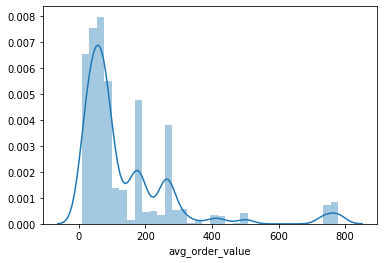

In [7]:
import seaborn as sns
sns.distplot(df.loc[df['avg_order_value']>0.0]['avg_order_value'])

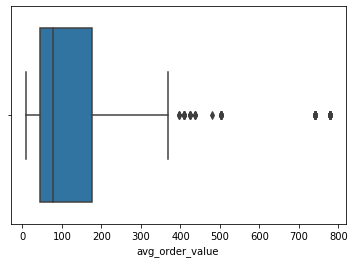

In [8]:
sns.boxplot(df.loc[df['avg_order_value']>0.0]['avg_order_value'])

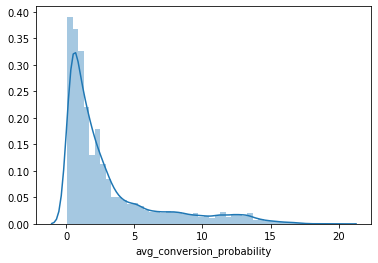

In [9]:
sns.distplot(df.loc[df['avg_conversion_probability']>0.0]['avg_conversion_probability'])

In [10]:
df['avg_conversion_probability']

0       20.1
1       19.8
2       19.3
3       18.8
4       18.4
5       17.8
6       17.5
7       17.5
8       17.3
9       17.1
10      17.0
11      17.0
12      17.0
13      16.9
14      16.9
15      16.8
16      16.7
17      16.7
18      16.6
19      16.5
20      16.5
21      16.5
22      16.5
23      16.5
24      16.4
25      16.4
26      16.4
27      16.4
28      16.3
29      16.2
        ... 
8356     0.1
8357     0.1
8358     0.1
8359     0.1
8360     0.1
8361     0.1
8362     0.1
8363     0.1
8364     0.1
8365     0.1
8366     0.1
8367     0.1
8368     0.1
8369     0.1
8370     0.1
8371     0.1
8372     0.1
8373     0.1
8374     0.1
8375     0.1
8376     0.1
8377     0.1
8378     0.1
8379     0.0
8380     0.0
8381     0.0
8382     0.0
8383     0.0
8384     0.0
8385     0.0
Name: avg_conversion_probability, Length: 8386, dtype: float64

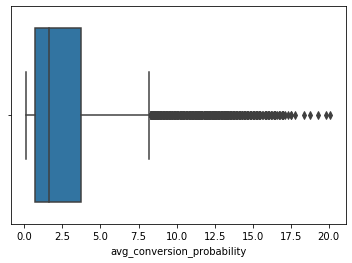

In [11]:
sns.boxplot(df.loc[df['avg_conversion_probability']>0.0]['avg_conversion_probability'])

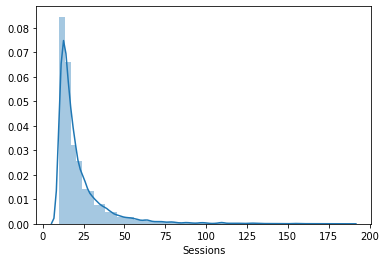

In [12]:
sns.distplot(df[df['Sessions']>0.0]['Sessions'])

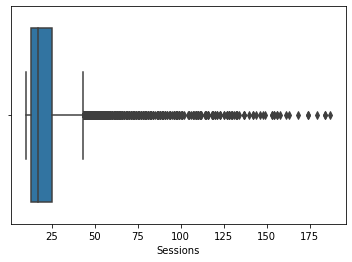

In [13]:
sns.boxplot(df[df['Sessions']>0.0]['Sessions'])

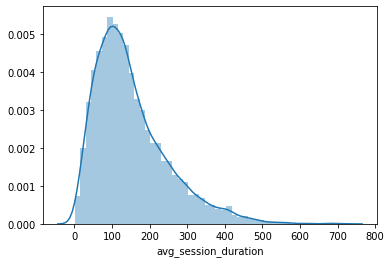

In [14]:
sns.distplot(df[df['avg_session_duration']>0.0]['avg_session_duration'])

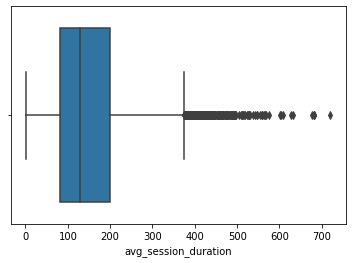

In [15]:
sns.boxplot(df.loc[df['avg_session_duration']>0.0]['avg_session_duration'])

In [16]:

def plot_pie_num(data,x,s):
    data['ones']  = np.ones(data.shape[0])
    grouped_data = data.groupby([str(x)]).agg({'ones':'sum'})/data.shape[0]*100
    grouped_data2 = grouped_data.reset_index()
    grouped_data2.rename({'ones':'frequency'},inplace = True, axis = 1)
    #plotting default ratios
    fig1, ax1 =plt.subplots(figsize=s)
    ax1.pie(grouped_data2['frequency'],labels= grouped_data2[str(x)] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(str(x)+" frequency",fontweight = "bold")

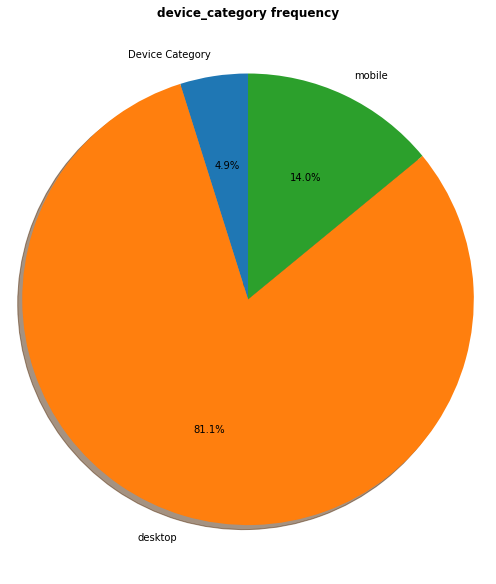

In [17]:
plot_pie_num(df,'device_category',s =(7,8))

In [18]:
df['affinity_category_reach'].value_counts().head(30).sum()/df.shape[0]

0.7683043167183401

In [19]:
len(df['affinity_category_reach'].unique())

87

# Bivariate Analysis

## Conversion Probability Vs Device

In [20]:
df.shape

(8386, 12)

In [21]:
device_categories = df['device_category'].unique()
mydct = {}
for i in  device_categories:
    mydct[i] = df[df['device_category']==i]['avg_conversion_probability'].values

Text(0.5, 1.0, 'Average Conversion Probabilities vs Device')

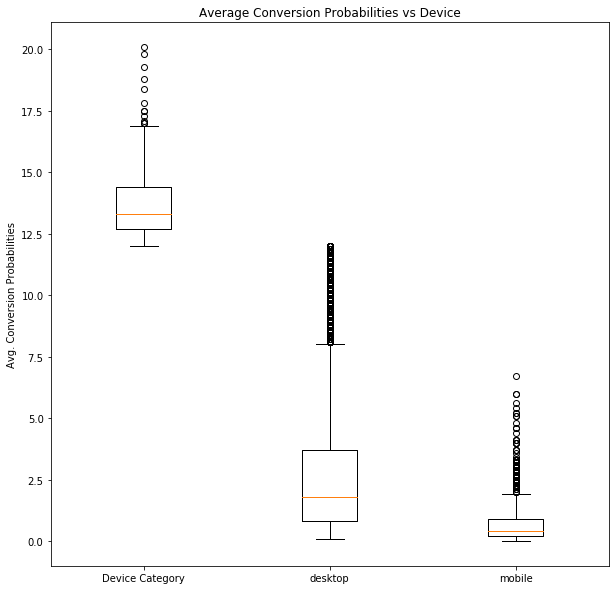

In [22]:

plt.figure(figsize=(10,10))
plt.boxplot(mydct.values())
#plt.set_xticklabels(mydct.keys())
plt.xticks([1,2,3],labels = mydct.keys())
plt.ylabel('Avg. Conversion Probabilities')
plt.title('Average Conversion Probabilities vs Device')

## Avg. Session Duration vs Device

In [23]:
df.shape

(8386, 12)

In [24]:
dfp = df[df['avg_session_duration']>0]
device_categories = dfp['device_category'].unique()
dct_duration = {}
for i in  device_categories:
    dct_duration[i] = dfp[dfp['device_category']==i]['avg_session_duration'].values

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text yticklabel objects>)

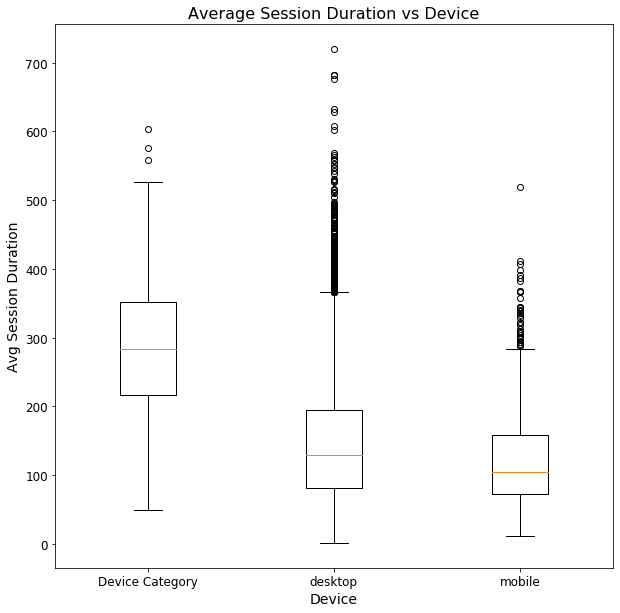

In [25]:

plt.figure(figsize=(10,10))
plt.boxplot(dct_duration.values())
plt.xticks([1,2,3],labels = dct_duration.keys())
plt.ylabel('Avg Session Duration', fontsize = 14)
plt.xlabel('Device', fontsize = 14)
plt.title('Average Session Duration vs Device', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize= 12)

## New Users vs Device

In [26]:
df.shape

(8386, 12)

In [27]:
dfp = df[df['new_users']>0]
device_categories = dfp['device_category'].unique()
dct = {}
for i in  device_categories:
    dct[i] = dfp[dfp['device_category']==i]['new_users'].values

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text yticklabel objects>)

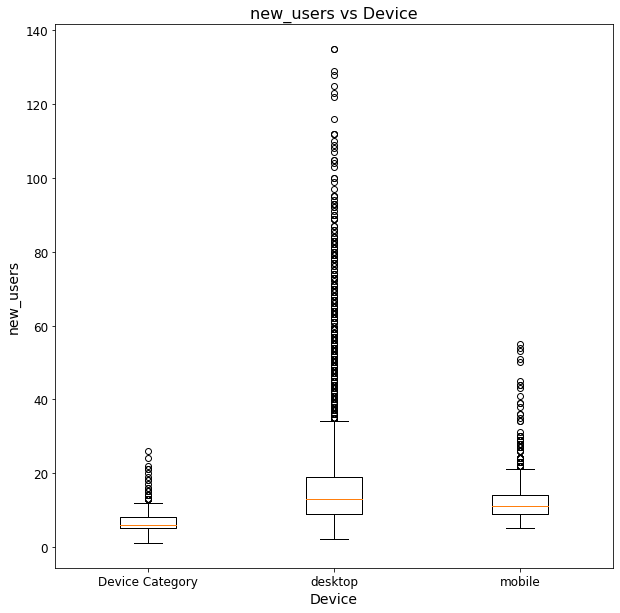

In [28]:

plt.figure(figsize=(10,10))
plt.boxplot(dct.values())
plt.xticks([1,2,3],labels = dct.keys())
plt.ylabel('new_users', fontsize = 14)
plt.xlabel('Device', fontsize = 14)
plt.title('new_users vs Device', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize= 12)

## Avg Order Value vs Device

In [29]:
df.shape

(8386, 12)

In [30]:
dfp= df[df['avg_order_value']>0]
device_categories = dfp['device_category'].unique()
dct = {}
for i in  device_categories:
    dct[i] = dfp[dfp['device_category']==i]['new_users'].values

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

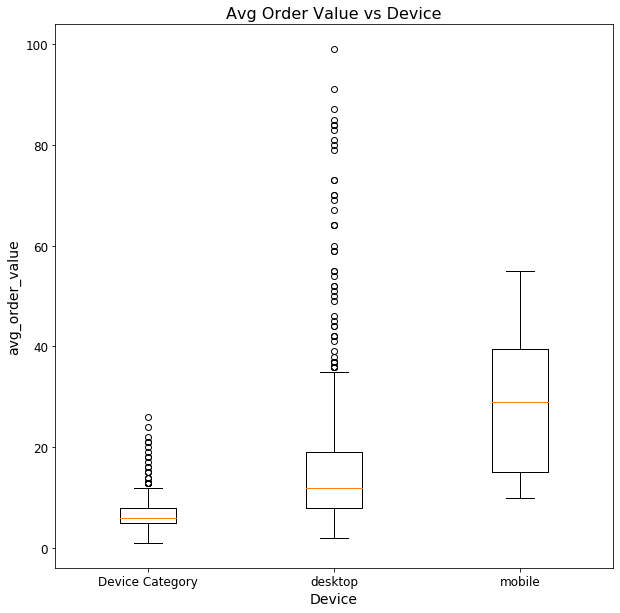

In [31]:
plt.figure(figsize=(10,10))
plt.boxplot(dct.values())
plt.xticks([1,2,3],labels = dct.keys())
plt.ylabel('avg_order_value', fontsize = 14)
plt.xlabel('Device', fontsize = 14)
plt.title('Avg Order Value vs Device', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize= 12)

In [32]:
df.columns.tolist()

['device_category',
 'in_market_segment',
 'affinity_category_reach',
 'day_of_week',
 'source_medium',
 'avg_conversion_probability',
 'avg_session_duration',
 'new_users',
 'Sessions',
 'avg_order_value',
 'avg_qty',
 'ones']

In [33]:
corr = df[['avg_conversion_probability','avg_session_duration',
    'new_users','Sessions','avg_order_value','avg_qty']].corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

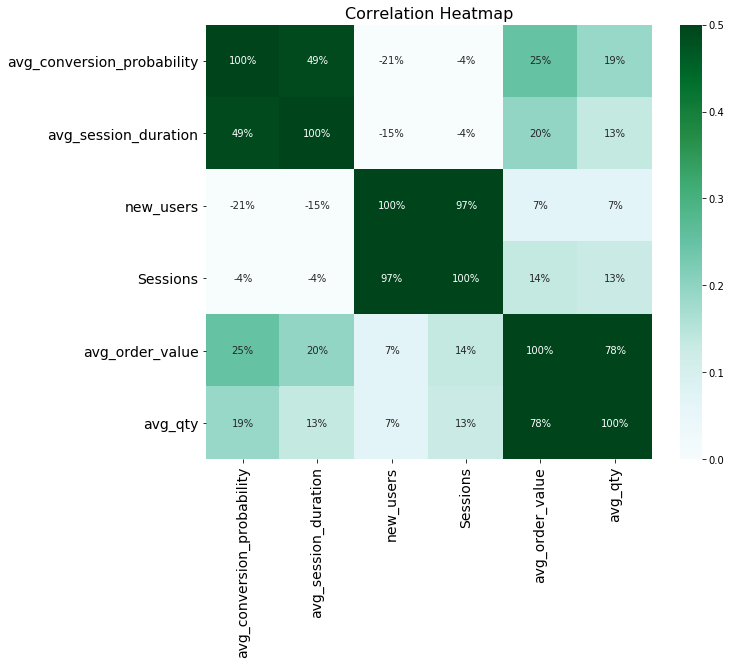

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.title('Correlation Heatmap', fontsize = 16)
sns.heatmap(data = corr,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.xticks(fontsize = 14)
plt.yticks(fontsize= 14)


## Correlation with Normalized Values

In [35]:
df2 = df[['avg_conversion_probability','avg_session_duration',
    'new_users','Sessions','avg_order_value','avg_qty']]

In [36]:
from scipy import stats
z_scores = stats.zscore(df2,ddof=1)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <5 ).all(axis=1)
new_df = df[filtered_entries]
corr2 = new_df.corr()

In [37]:
new_df = new_df[['avg_conversion_probability','avg_session_duration',
    'new_users','Sessions','avg_order_value','avg_qty']]
corr2 = new_df.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

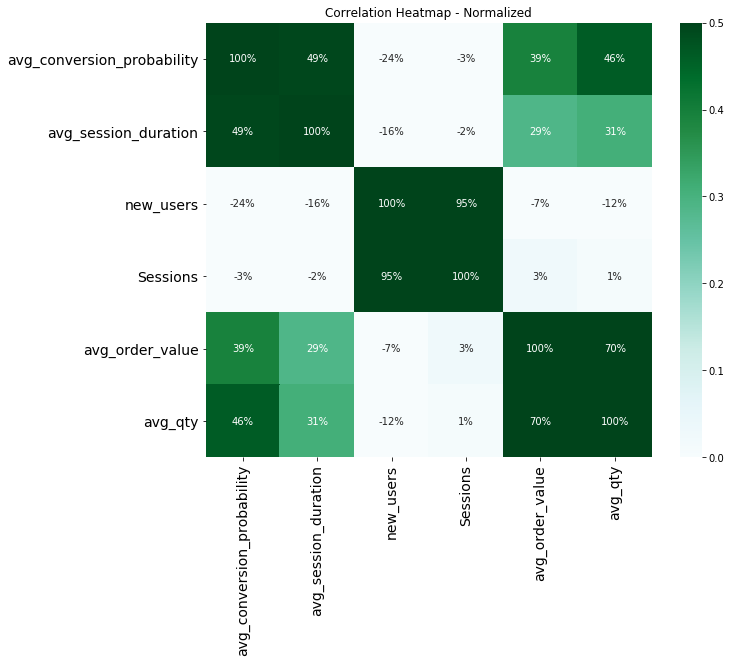

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.title('Correlation Heatmap - Normalized')
sns.heatmap(data = corr2,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.xticks(fontsize = 14)
plt.yticks(fontsize= 14)

In [39]:
""""
grid = sns.pairplot(new_df)
grid = grid.map_upper(plt.scatter, color = 'darkred')

grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
"""

'"\ngrid = sns.pairplot(new_df)\ngrid = grid.map_upper(plt.scatter, color = \'darkred\')\n\ngrid = grid.map_diag(plt.hist, bins = 10, color = \'darkred\', \n                     edgecolor = \'k\')\n# Map a density plot to the lower triangle\ngrid = grid.map_lower(sns.kdeplot, cmap = \'Reds\')\n'

<Figure size 1440x720 with 0 Axes>

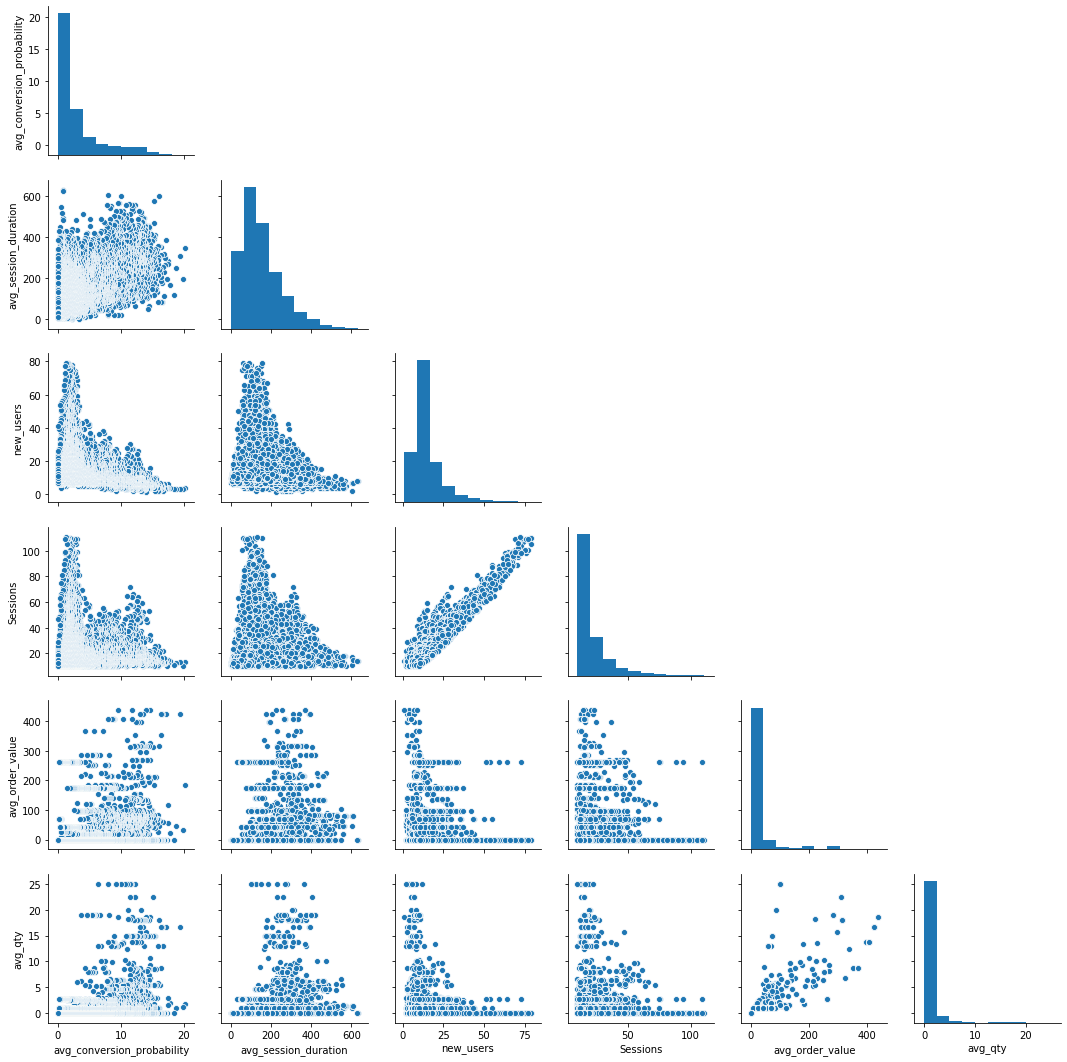

In [40]:
plt.figure(figsize = (20,10))
g = sns.pairplot(new_df)
#g = g.map_lower(sns.kdeplot, cmap = 'greens')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
#sns.set(font_scale = 1.1)
#for ax in g.axes.flat: 
#    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

plt.show()


C:\Users\ritvik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\ritvik\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\ritvik

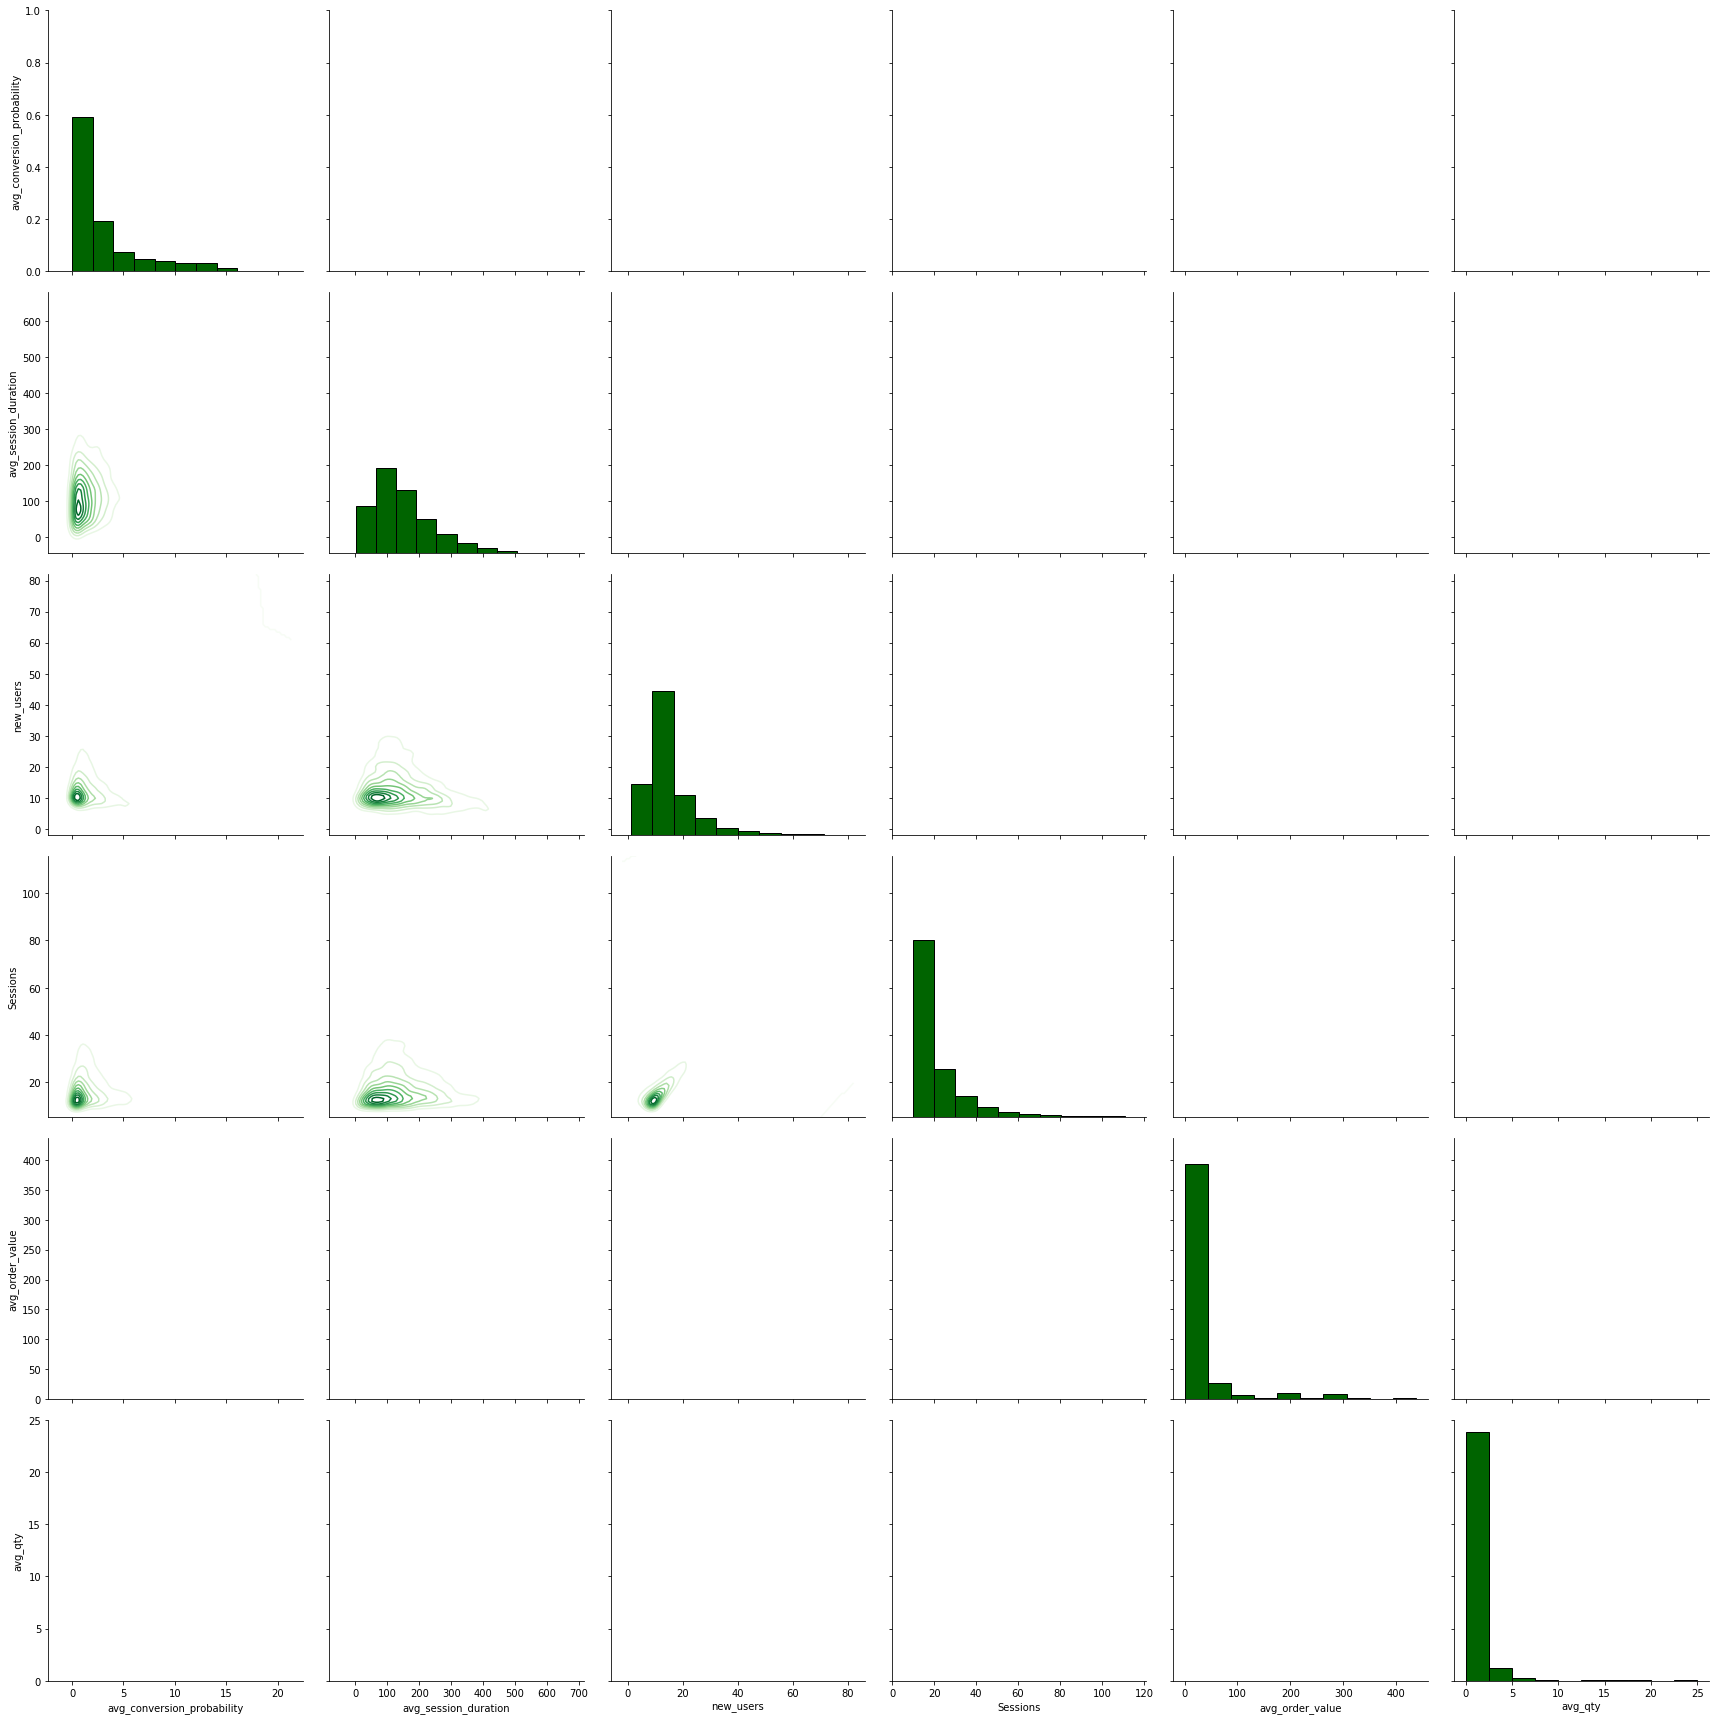

In [41]:

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


grid = sns.PairGrid(data= new_df, size = 4)

# Map the plots to the locations
grid = grid.map_lower(sns.kdeplot, cmap = 'Greens')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkgreen')
